<img src="https://designguide.ku.dk/download/co-branding/ku_logo_uk_h.png" alt="University logo" width="300" align="right"/>

Modified teaching materials from Scientific programming (7.5 ECTS) of MSc Programme in IT and Cognition. The lecturer is Ali Basirat (alib@hum.ku.dk). 


### Matrix multiplication

Let's start by a classification problem.

Spam detection! We want to determine if an email is a spam or not.

Our task!

List of e-mails:
 * Email1: new offer . buy cheap viagra in our online shop
 * Email2: sweety i will arrive home late cheers i love you
 * Email3: the department meeting will be delayed until tomorrow because i will be ill
 * Email4: in our classes we will learn how to deal with drug dealers and young teenagers

Given that data, we must decide if each message is Spam or not

And, not only that, but also which e-mails are actually from work.

 ### First step
 
 Represent the data as a sparse matrix.
 

| WORDS | and | the | house | meeting | shop | love | arrive | ... |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|EMAIL 1 | 5 | 3 | 1 | 0 | 0 | 2 | 1 | 1 |
|EMAIL 2 | 7 | 6 | 2 | 0 | 0 | 2 | 1 | 1 |
|EMAIL 3 | 8 | 3 | 0 | 4 | 0 | 2 | 1 | 1 |
|EMAIL 4 | 6 | 4 | 0 | 0 | 0 | 0 | 1 | 1 |

 ### Second step
 
 Define a weight vector, which will measure the relationship of a word with the property we want to assign ("spamness", "workness", ...)
 
| WORDS | viagra | arrive | sex | offer | house | and | the | ... |
|:-----|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| Spam-weights | 0.9 | 0.3 | 0.7 | 0.8 | 0.3 | 0.1 | 0.05 | ... |
| Work-weights | ... | ... | ... | ... | ... | ... | ... | ... |

<center>The point, now, is to learn how to combine this information</center>

# Linear Algebra

## Vector

+ A single dimensional array of numbers
+ Useful for representing each email


EMAIL_1 = $\begin{pmatrix}
  5 \\ 3 \\ 1 \\ 0 \\ 0 \\ 2 \\ 1 \\ 1 \\ . \\ . \\ . \\
\end{pmatrix}$

## Matrix 

+ A two dimensional array of numbers.
+ Useful for representing a batch of documents and weight vectors


EMAILS = $\begin{pmatrix}
  5 & 7 & 8 & 6 \\ 
  3 & 6 & 3 & 4 \\ 
  1 & 2 & 0 & 0 \\ 
  0 & 0 & 4 & 0 \\ 
  0 & 0 & 0 & 0 \\ 
  2 & 2 & 2 & 0 \\ 
  1 & 1 & 1 & 1 \\
  & & ... & \\
\end{pmatrix}$

We can add matrices:
    
$\begin{pmatrix}
  5 & 9 \\ 1 & 2 \\
\end{pmatrix}
+
\begin{pmatrix}
  1 & 2 \\ 3 & 4 \\
\end{pmatrix}
=\begin{pmatrix}
  6 & 11 \\ 4 & 6 \\
\end{pmatrix}
$

We add the matrices elementwise.

The sum of matrices is commutative:

$\begin{pmatrix}
  1 & 2 \\ 3 & 4 \\
\end{pmatrix}
+
\begin{pmatrix}
  5 & 9 \\ 1 & 2 \\
\end{pmatrix}
=\begin{pmatrix}
  6 & 11 \\ 4 & 6 \\
\end{pmatrix}
$


We can also multiply a matrix with a scalar. We get the result multiplying each element with the scalar:

$3
*
\begin{pmatrix}
  1 & 2 \\ 3 & 4 \\
\end{pmatrix}
=\begin{pmatrix}
  3 & 6 \\ 9 & 12 \\
\end{pmatrix}
$

But what about multiplying a matrix with another matrix?

$\begin{pmatrix}
  1 & 2 \\ 3 & 4 \\
\end{pmatrix}
*
\begin{pmatrix}
  5 & 9 \\ 1 & 2 \\
\end{pmatrix}
=\begin{pmatrix}
  5 & 18 \\ 3 & 8 \\
\end{pmatrix} ?
$

<center><b>No!! That's not correct!</b></center>

Matrix multiplication is a bit different.

<center>BLACKBOARD</center>

For multiplication, then, should the matrices have the same size? Let's see it.

$\begin{pmatrix}
  a & b & c \\
  d & e & f \\
\end{pmatrix}$

This is a matrix with dimensions $2\times{}3$.

Remember: $ROWS\times{}COLUMNS$

We can multiply such matrix with, e.g., this matrix:

$\begin{pmatrix}
  g & h & i & j \\
  k & l & m & n \\
  o & p & q & r \\
\end{pmatrix}$

whose dimensions are $3\times{}4$

So, if we multiply two matrices of dimensions, e.g., $2\times{}3$ and $3\times{}4$, the results dimensions will be $2\times{}4$

$\begin{pmatrix}
  a & b & c \\
  d & e & f \\
\end{pmatrix} *
\begin{pmatrix}
  g & h & i & j \\
  k & l & m & n \\
  o & p & q & r \\
\end{pmatrix} = 
\begin{pmatrix}
  s & t & u & v \\
  w & x & y & z \\
\end{pmatrix}$

And how to program this in Python? For example:

$\begin{pmatrix}
  5 & 9 \\ 1 & 2 \\ 1 & 2 \\
\end{pmatrix}
*
\begin{pmatrix}
  1 & 2 \\ 3 & 4 \\
\end{pmatrix}
$

$5*1 + 9*3 = 32$

$5*2 + 9*4 = 46$

$\ldots$

$\begin{pmatrix}
  5 & 9 \\ 1 & 2 \\ 1 & 2 \\
\end{pmatrix}
*
\begin{pmatrix}
  1 & 2 \\ 3 & 4 \\
\end{pmatrix}
=\begin{pmatrix}
  32 & 46 \\ 7 & 10 \\ 7 & 10 \\
\end{pmatrix}
$

In [ ]:
A = np.array([[5,9],[1,2],[1,2]])
B = np.array([[1,2],[3,4]])

# print(np.dot(A,B)) # 矩阵乘法又称为点积，因此在numpy中使用的是dot函数
# 复习以下矩阵的运算符号有哪些，于numpy中的对应是什么
# 规范以下用法，矩阵的数学运算一律通过 "np."的方式写
# 其他的都是对应元素的运算，比如直接使用 + - * / 都是直接运算—— element wise operation
# print("+:\n", B + B)
# print("-:\n", B - B)
# print("*:\n", B * B)
# print("/:\n", B / B)
# print("np.multiply():\n", np.multiply(B, B)) # 这也是element wise operation
# print("np.divide():\n", np.divide(B, B)) # 这也是element wise operation

# 数学矩阵运算
# print("np.add():\n", np.add(B, B)) # 矩阵加法
# print("np.subtract():\n", np.subtract(B, B)) # 矩阵减法
# print("np.dot():\n", np.dot(B, B)) # 矩阵乘法
# print("np.dot(5):\n", np.dot(5, B)) # 数乘
'''
If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).
If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.
If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.
If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.
If a is an N-D array and b is an M-D array (where M>=2), it is a sum product over the last axis of a and the second-to-last axis of b:
dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
'''
# 矩阵除法就是乘以矩阵的逆矩阵
print("逆:\n", np.linalg.inv(B)) # 矩阵求逆
print("矩阵除法:\n", np.dot(np.linalg.inv(B), B))
print("逆:\n", np.matrix(B).I) # 矩阵求逆
print("矩阵除法:\n", np.dot(np.matrix(B).I, B))
print("逆:\n", np.matrix(B).getI()) # 矩阵求逆
print("矩阵除法:\n", np.dot(np.matrix(B).getI(), B))
print("伪逆:\n", np.linalg.pinv(B)) # 矩阵求伪逆 pseudo-inverse
print("矩阵除法:\n", np.dot(np.linalg.pinv(B), B))


逆:
 [[-2.   1. ]
 [ 1.5 -0.5]]
矩阵除法:
 [[1.0000000e+00 4.4408921e-16]
 [0.0000000e+00 1.0000000e+00]]
逆:
 [[-2.   1. ]
 [ 1.5 -0.5]]
矩阵除法:
 [[1.0000000e+00 4.4408921e-16]
 [0.0000000e+00 1.0000000e+00]]
逆:
 [[-2.   1. ]
 [ 1.5 -0.5]]
矩阵除法:
 [[1.0000000e+00 4.4408921e-16]
 [0.0000000e+00 1.0000000e+00]]
伪逆:
 [[-2.   1. ]
 [ 1.5 -0.5]]
矩阵除法:
 [[ 1.0000000e+00  0.0000000e+00]
 [-4.4408921e-16  1.0000000e+00]]


<center>Now, then, let's recall the previous example about e-mail classification.</center>

Our task!

List of e-mails:
 * Email1: new offer . buy cheap viagra in our online shop
 * Email2: sweety i will arrive home late cheers i love you
 * Email3: the department meeting will be delayed until tomorrow because i will be ill
 * Email4: in our classes we will learn how to deal with drug dealers and young teenagers
 
Given that data, we must decide if each message is Spam or not

And, not only that, but also which e-mails are actually from work.

 ### First step
 
 Represent the data as a sparse matrix.
 

| WORDS | and | the | house | meeting | shop | love | arrive | ... |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|EMAIL 1 | 5 | 3 | 1 | 0 | 0 | 2 | 1 | ... |
|EMAIL 2 | 7 | 6 | 2 | 0 | 0 | 2 | 1 | ... |
|EMAIL 3 | 8 | 3 | 0 | 4 | 0 | 2 | 1 | ... |
|EMAIL 4 | 6 | 4 | 0 | 0 | 0 | 0 | 1 | ... |

If we have a vocabulary of 500 words, we will have 4 rows and 500 columns.

 ### Second step
 
 Define a weight vector, which will measure the relationship of a word with the property we want to assign ("spamness", "workness", ...)
 
| WORDS | and | the | house | meeting | shop | love | arrive | ... |
|:-----|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| Spam-weights | 0.001 | 0.002 | 0.05 | 0.1 | 0.3 | 0.4 | 0.05 | ... |
| Work-weights | ... | ... | ... | 0.4 | ... | ... | 0.3 | ... |

If we have two tasks (spam and work), the matrix will have 2 rows and 500 columns.

Then, the dimensions of the first matrix are $4 \times 500$

The dimensions of the second one are $2 \times 500$

Their dimensions are $4 \times 500$ and $2 \times 500$. In order to multiply them:

<center>500 == 2?</center>

Solution: Transpose the second matrix.

Keep the first matrix/table as it is.

| WORDS | and | the | house | meeting | shop | love | arrive | ... |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|EMAIL 1 | 5 | 3 | 1 | 0 | 0 | 2 | 1 | ... |
|EMAIL 2 | 7 | 6 | 2 | 0 | 0 | 2 | 1 | ... |
|EMAIL 3 | 8 | 3 | 0 | 4 | 0 | 2 | 1 | ... |
|EMAIL 4 | 6 | 4 | 0 | 0 | 0 | 0 | 1 | ... |


Take the second one and flip it over its diagonal. Then:

| WORDS | and | the | house | meeting | shop | love | arrive | ... |
|:-----|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| Spam-weights | 0.001 | 0.002 | 0.05 | 0.1 | 0.3 | 0.4 | 0.05 | ... |
| Work-weights | 0.003 | 0.004 | 0.08 | 0.4 | 0.2 | 0.1 | 0.3 | ... |

|WORDS | W_SPAM | W_WORK |
|:-----|:-----:|:-----:|
| and | 0.001 | 0.003 |
| the | 0.002 | 0.004 |
| house | 0.05 | 0.08 |
| meeting | 0.1 | 0.4 |
| shop | 0.3 | 0.2 |
| love | 0.4 | 0.1 |
| arrive | 0.05 | 0.3 |
| ... | ... | ... |

Visualization from Wikipedia:

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif"/>

In [ ]:
# 矩阵转置
print(A, '\n')
print(A * A, '\n')
print(A.transpose(), '\n')
print(A.T, '\n')
print(np.transpose(A), '\n')


[[5 9]
 [1 2]
 [1 2]] 

[[25 81]
 [ 1  4]
 [ 1  4]] 

[[5 1 1]
 [9 2 2]] 

[[5 1 1]
 [9 2 2]] 

[[5 1 1]
 [9 2 2]] 



Now we have a matrix of $4 \times 500$ dimensions and another one of $500 \times 2$ dimensions.

| WORDS | and | the | house | meeting | shop | love | arrive | ... |
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|EMAIL 1 | 5 | 3 | 1 | 0 | 0 | 2 | 1 | ... |
|EMAIL 2 | 7 | 6 | 2 | 0 | 0 | 2 | 1 | ... |
|EMAIL 3 | 8 | 3 | 0 | 4 | 0 | 2 | 1 | ... |
|EMAIL 4 | 6 | 4 | 0 | 0 | 0 | 0 | 1 | ... |

|WORDS | W_SPAM | W_WORK |
|:-----|:-----:|:-----:|
| and | 0.001 | 0.003 |
| the | 0.002 | 0.004 |
| house | 0.05 | 0.08 |
| meeting | 0.1 | 0.4 |
| shop | 0.3 | 0.2 |
| love | 0.4 | 0.1 |
| arrive | 0.05 | 0.3 |
| ... | ... | ... |

If we multiply each row from the first matrix with each column from the second matrix, we will get a number specifying the `spamness` or `workness` of each e-mail.

The results dimensions will be $4 \times 2$

$\begin{pmatrix}
  res_{spam,email_1} & res_{work,email_1} \\
  res_{spam,email_2} & res_{work,email_2} \\
  res_{spam,email_3} & res_{work,email_3} \\
  res_{spam,email_4} & res_{work,email_4} \\
\end{pmatrix}$

Then, a take home message.

+ Machine Learning is about learning those weights about the *spamness* or *workness* of each word.

And more...

#### Representing functions using numpy

Imagine we want to represent a linear function.

$$f(x) = mx + b$$

where, $m$ is the slope of the function and $b$ is the intercept of the function.

We need to define a function that gets two parameters, $m$ and $b$, and will return the function $f$.

Can we do that?

In [ ]:
# 这里比较有意思的是，在运行时动态创建了一个函数，并且返回了函数指针
def generate_linear_function(m,b):
    #First we create the function
    def local_func(x):
        return m*x + b
    
    #And then, we return the function! :-)
    return local_func

In [ ]:
f=generate_linear_function(5,7)

In [ ]:
f(5)

32

In [ ]:
f(-1)

2

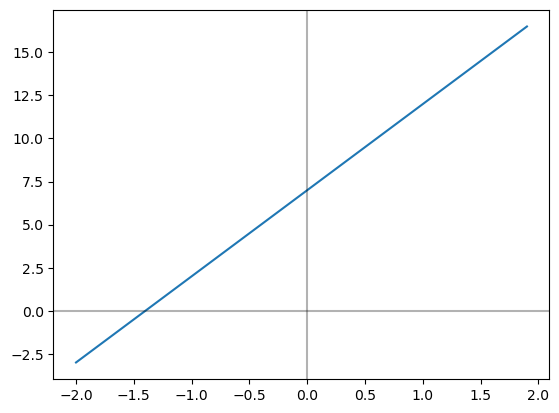

In [ ]:
xran=np.arange(-2,2,0.1)
plt.plot(xran,f(xran));
plt.axhline(0, color='black',alpha=0.3)
plt.axvline(0, color='black',alpha=0.3);